<a href="https://colab.research.google.com/github/impanaj07/deep_learning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3422 - loss: 1.7794 - val_accuracy: 0.4917 - val_loss: 1.4317
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.5456 - loss: 1.2715 - val_accuracy: 0.6115 - val_loss: 1.1147
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6156 - loss: 1.0945 - val_accuracy: 0.6183 - val_loss: 1.1108
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6603 - loss: 0.9755 - val_accuracy: 0.6653 - val_loss: 0.9672
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.6882 - loss: 0.8937 - val_accuracy: 0.6650 - val_loss: 0.9486
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.7173 - loss: 0.8170 - val_accuracy: 0.6970 - val_loss: 0.8729
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.7342 - loss: 0.7666 - val_accuracy: 0.6886 - val_loss: 0.8935
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.7471 - loss: 0.7225 - 

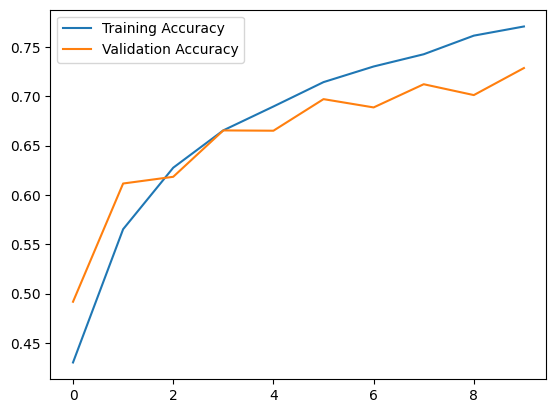

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Precision: 0.73
Recall: 0.73
F1-Score: 0.73


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# One-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Normalize pixel values to range 0-1
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy:.2f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Predict classes
y_pred = model.predict(testX)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(testY, axis=1)

# Calculate additional metrics
precision = precision_score(y_test_class, y_pred_class, average='macro')
recall = recall_score(y_test_class, y_pred_class, average='macro')
f1 = f1_score(y_test_class, y_pred_class, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
